# Outlier Detection and handling

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

In [149]:
data = pd.read_csv('House_Price.csv')

In [150]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [151]:
type(data)

pandas.core.frame.DataFrame

In [152]:
# Function to Detect Outlier on one-dimension dataset.
def find_outliers(data):
    outliers = []

    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
   
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    return outliers

In [153]:
outlier_detection = find_outliers(data['Price'])

In [154]:
len(outlier_detection)

42

In [155]:
data.Price.skew()

np.float64(6.523349573058705)

<Axes: xlabel='Price', ylabel='Density'>

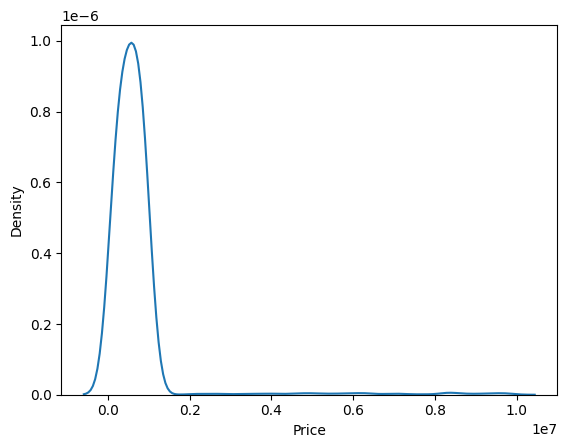

In [156]:
sns.kdeplot(data.Price)

In [157]:
data['transformed_price'] = np.log(data.Price)

In [158]:
data.transformed_price.skew()

np.float64(-0.11783094716825372)

In [159]:
finding_outliers = find_outliers(data.transformed_price)

In [160]:
len(finding_outliers)

31

<Axes: xlabel='transformed_price', ylabel='Density'>

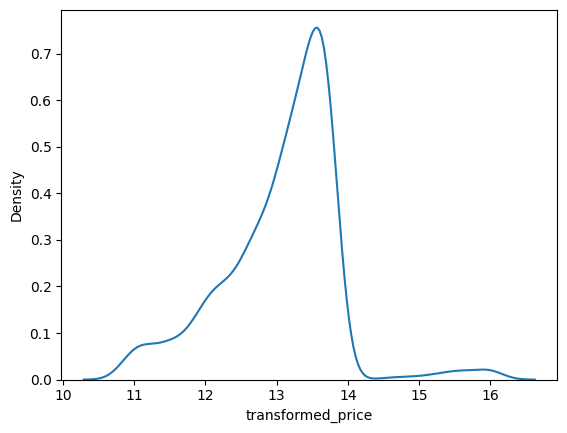

In [161]:
sns.kdeplot(data.transformed_price)

In [162]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [163]:
# Using Z Score
outliers=[]
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [164]:
detect_outliers(dataset)

[102, 107, 108]

In [165]:
dataset = sorted(dataset)

In [166]:
q1,q3 = np.percentile(dataset, [25, 75])
print(q1,q3)

12.0 15.0


In [167]:
iqr = q3 - q1
print(iqr)

3.0


In [168]:
# Find upper & lower fence
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
print(lower_fence, upper_fence)

7.5 19.5


<Axes: >

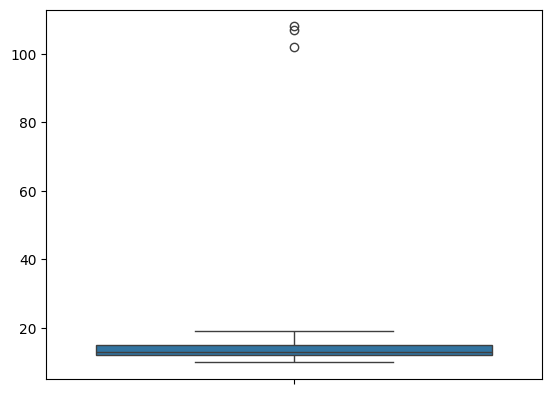

In [169]:
sns.boxplot(dataset)